# 라이브러리 import

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='NanumGothic'
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Data load

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path_train = "/content/drive/MyDrive/건국대_정보통신대학원/25_2학기/머신러닝기반연구방법론/과제_kaggle/data/train.csv"
path_test = "/content/drive/MyDrive/건국대_정보통신대학원/25_2학기/머신러닝기반연구방법론/과제_kaggle/data/test.csv"

data_train = pd.read_csv(path_train, index_col='id')
data_test = pd.read_csv(path_test, index_col ='id')

print(data_train.shape)
print(data_test.shape)

(593994, 12)
(254569, 11)


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593994 entries, 0 to 593993
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   annual_income         593994 non-null  float64
 1   debt_to_income_ratio  593994 non-null  float64
 2   credit_score          593994 non-null  int64  
 3   loan_amount           593994 non-null  float64
 4   interest_rate         593994 non-null  float64
 5   gender                593994 non-null  object 
 6   marital_status        593994 non-null  object 
 7   education_level       593994 non-null  object 
 8   employment_status     593994 non-null  object 
 9   loan_purpose          593994 non-null  object 
 10  grade_subgrade        593994 non-null  object 
 11  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 58.9+ MB


In [ ]:
int_col = []
float_col = []
object_col = []

for i in data_train.columns:
  if data_train[i].dtypes=='int':
    int_col.append(i)

  elif data_train[i].dtypes=='float':
    float_col.append(i)

  else:
    object_col.append(i)

print(f"int 컬럼 {int_col}")
print(f"float 컬럼 {float_col}")
print(f"object 컬럼 {object_col}")


int 컬럼 ['credit_score']
float 컬럼 ['annual_income', 'debt_to_income_ratio', 'loan_amount', 'interest_rate', 'loan_paid_back']
object 컬럼 ['gender', 'marital_status', 'education_level', 'employment_status', 'loan_purpose', 'grade_subgrade']


In [ ]:
data_train.describe()

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_paid_back
count,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000
mean,48212.202976,0.120696,680.916009,15020.297629,12.356345,0.798820
std,26711.942078,0.068573,55.424956,6926.530568,2.008959,0.400883
min,6002.430000,0.011000,395.000000,500.090000,3.200000,0.000000
25%,27934.400000,0.072000,646.000000,10279.620000,10.990000,1.000000
50%,46557.680000,0.096000,682.000000,15000.220000,12.370000,1.000000
75%,60981.320000,0.156000,719.000000,18858.580000,13.680000,1.000000
max,393381.740000,0.627000,849.000000,48959.950000,20.990000,1.000000


In [ ]:
data_train.head()

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
id,,,,,,,,,,,,
0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [ ]:
for i in data_train.columns:
    if data_train[i].dtypes == 'object':
        print(f"{i} : {data_train[i].unique()}", "\n")

gender : ['Female' 'Male' 'Other'] 

marital_status : ['Single' 'Married' 'Divorced' 'Widowed'] 

education_level : ['High School' "Master's" "Bachelor's" 'PhD' 'Other'] 

employment_status : ['Self-employed' 'Employed' 'Unemployed' 'Retired' 'Student'] 

loan_purpose : ['Other' 'Debt consolidation' 'Home' 'Education' 'Vacation' 'Car'
 'Medical' 'Business'] 

grade_subgrade : ['C3' 'D3' 'C5' 'F1' 'D1' 'D5' 'C2' 'C1' 'F5' 'D4' 'C4' 'D2' 'E5' 'B1'
 'B2' 'F4' 'A4' 'E1' 'F2' 'B4' 'E4' 'B3' 'E3' 'B5' 'E2' 'F3' 'A5' 'A3'
 'A1' 'A2'] 



In [ ]:
print("=================결측치 확인=================")
print(data_train.isnull().sum())

=================결측치 확인=================
annual_income           0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
interest_rate           0
gender                  0
marital_status          0
education_level         0
employment_status       0
loan_purpose            0
grade_subgrade          0
loan_paid_back          0
dtype: int64


In [ ]:
print("=================중복값 확인=================")
duplicated_rows = data_train[data_train.duplicated()]
print(f"중복된 행의 개수: {len(duplicated_rows)}")

if not duplicated_rows.empty:
    print(duplicated_rows)
else:
    print("중복된 행이 없습니다.")

=================중복값 확인=================
중복된 행의 개수: 0
중복된 행이 없습니다.


'loan_paid_back'의 고유 값 분포: loan_paid_back
1.0    474494
0.0    119500
Name: count, dtype: int64


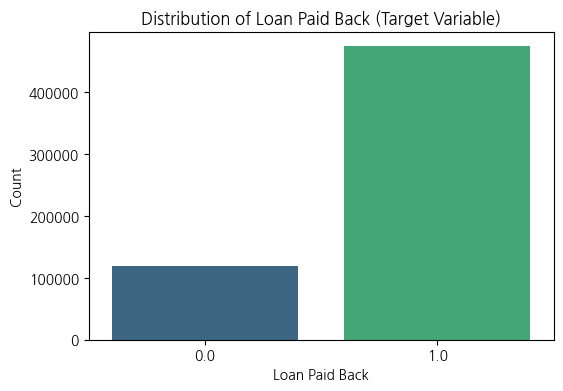

In [ ]:
# 클래스 비율 확인
y = data_train['loan_paid_back']
print(f"'loan_paid_back'의 고유 값 분포: {y.value_counts()}")

plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette='viridis')
plt.title('Distribution of Loan Paid Back (Target Variable)')
plt.xlabel('Loan Paid Back')
plt.ylabel('Count')
plt.show()

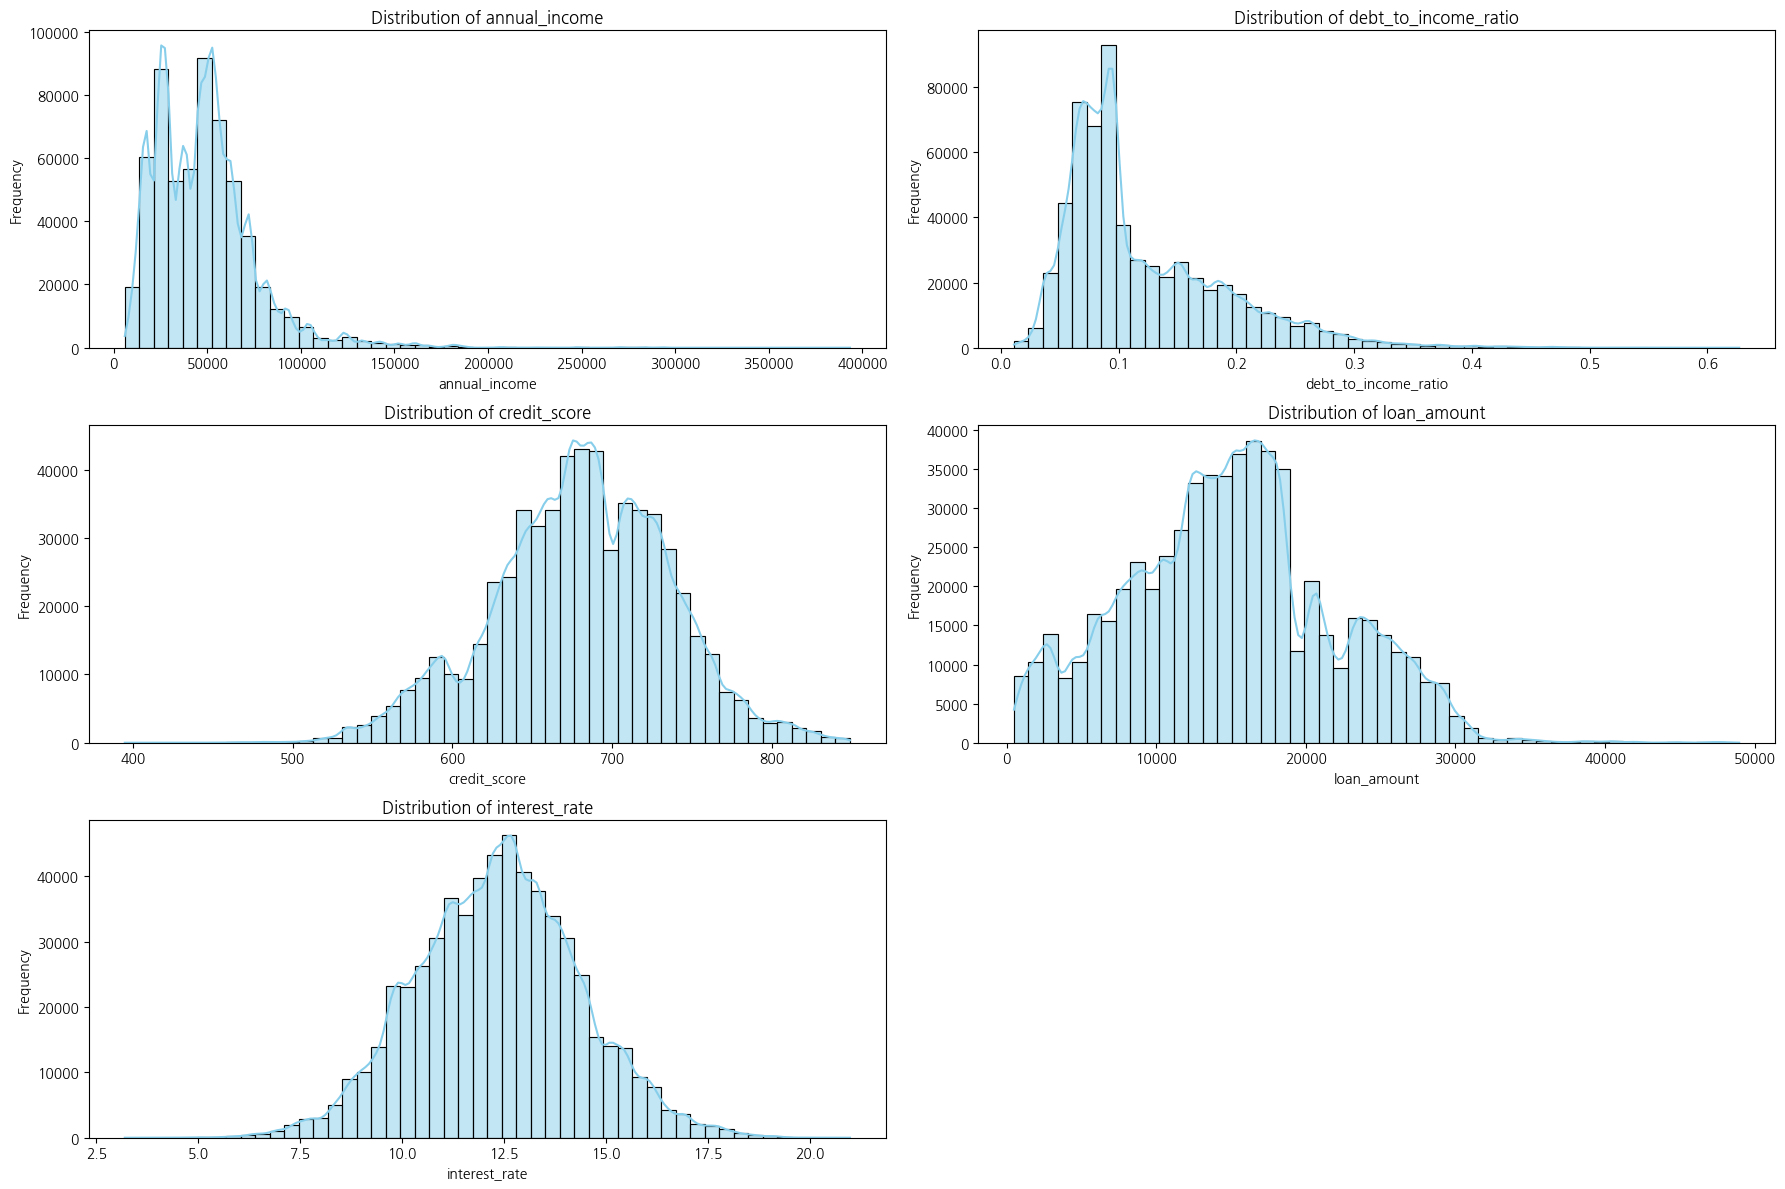

In [ ]:
# 수치형 컬럼 시각화

numerical_cols = ['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount', 'interest_rate']

plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i + 1) # 3 rows, 2 columns
    sns.histplot(data_train[col], kde=True, bins=50, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

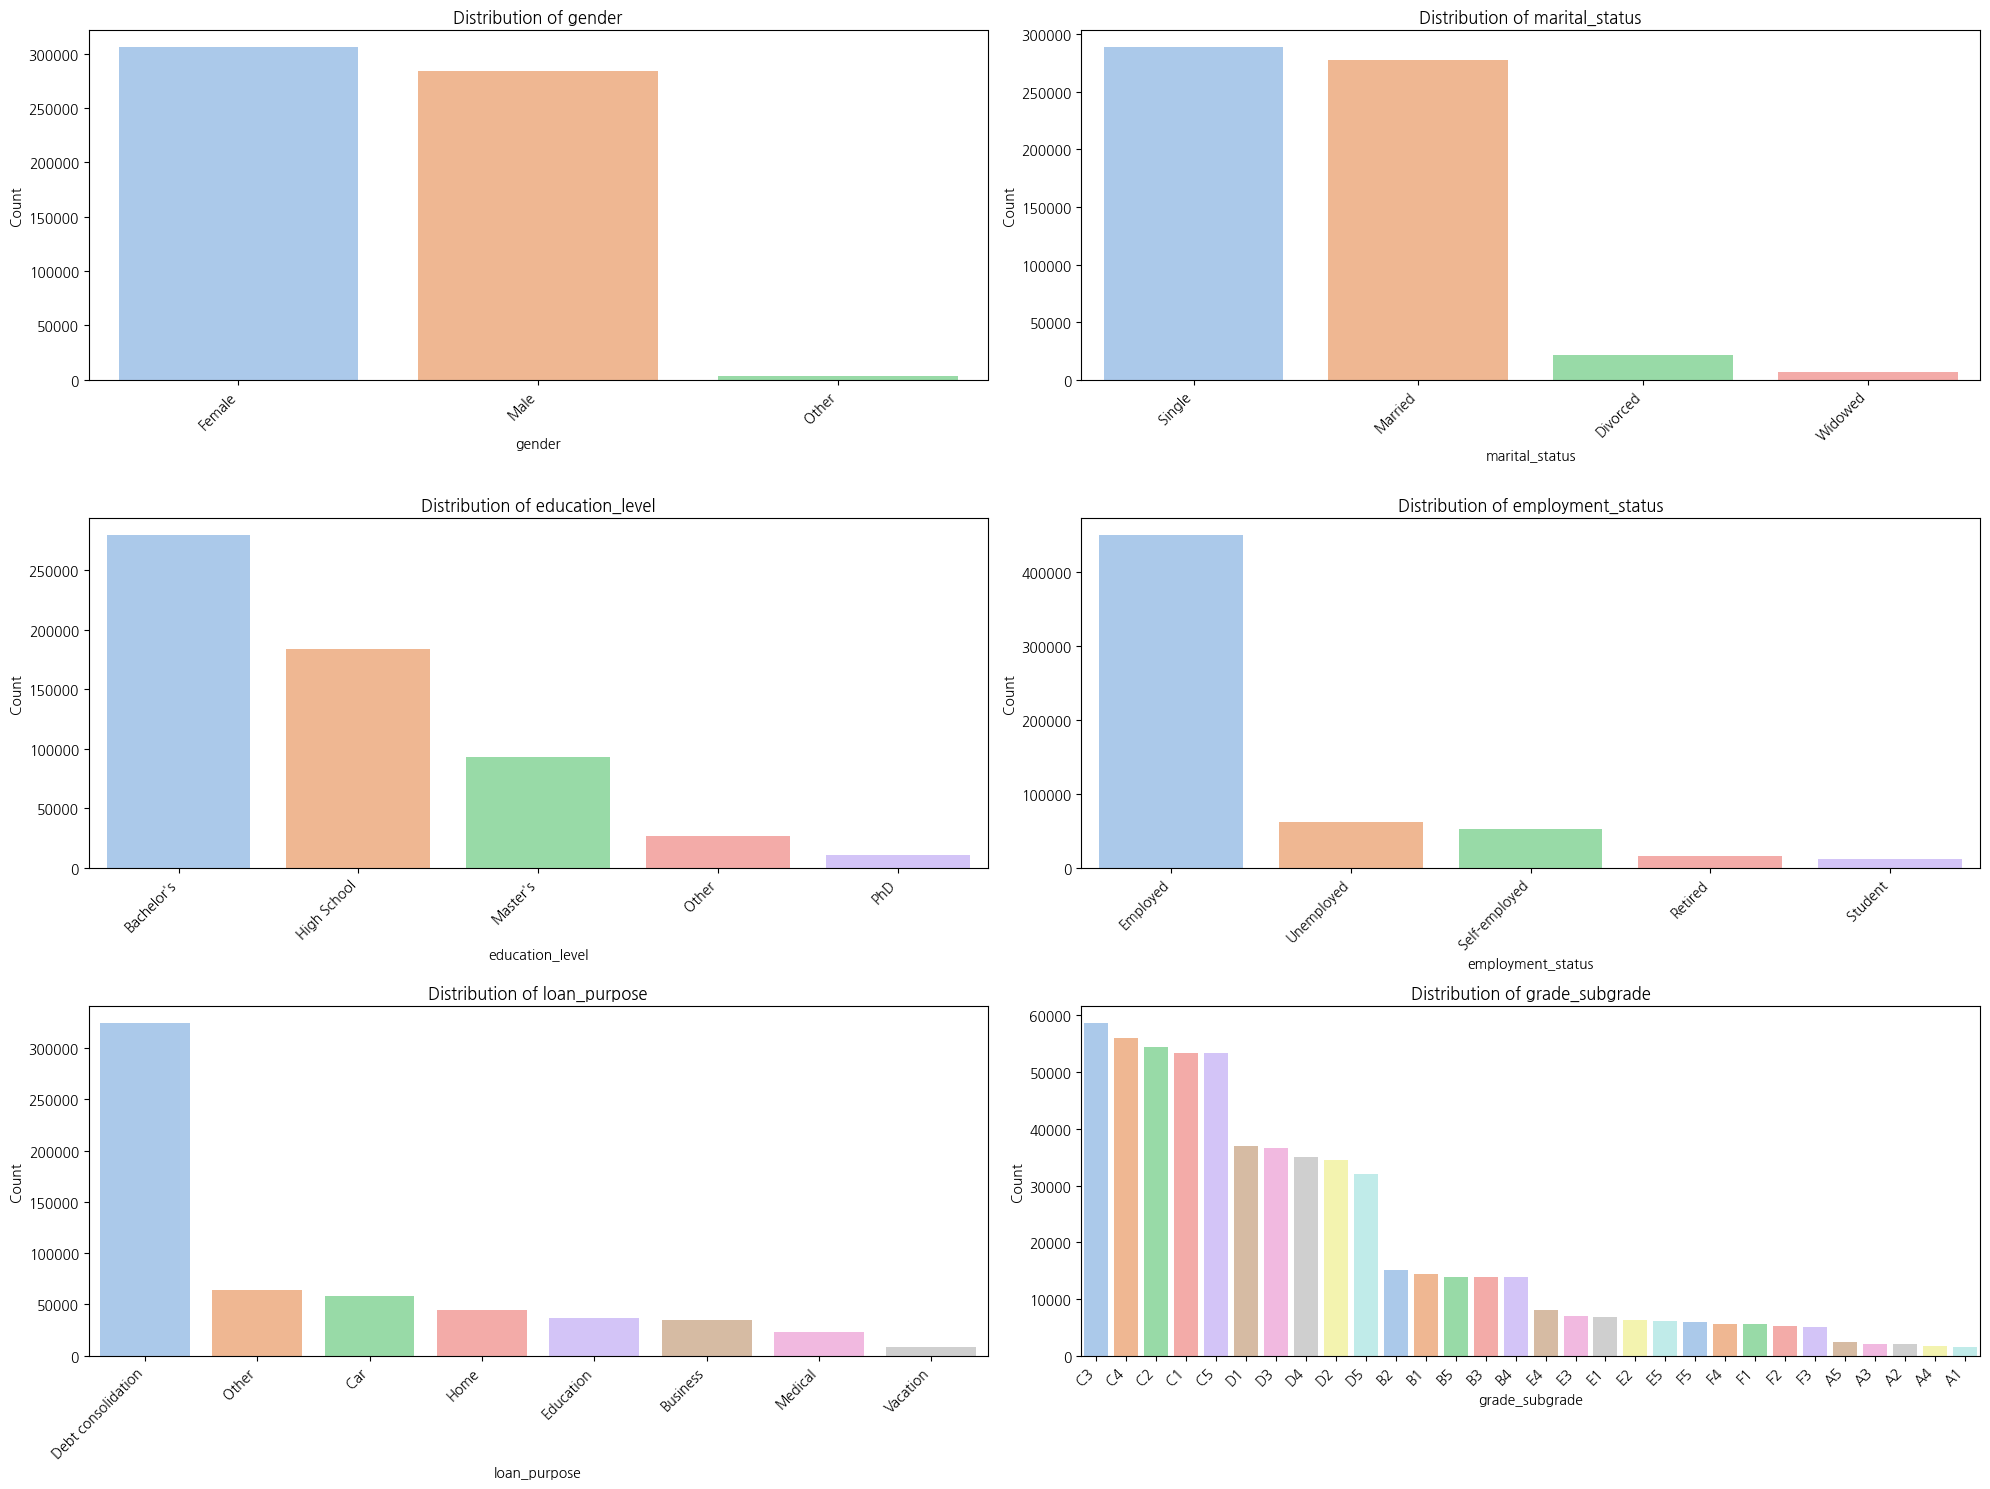

In [ ]:
# 범주형 컬럼 시각화

categorical_cols = ['gender', 'marital_status', 'education_level', 'employment_status', 'loan_purpose', 'grade_subgrade']

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 2, i + 1)
    sns.countplot(data=data_train, x=col, palette='pastel', order=data_train[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

=================이상치 확인=================


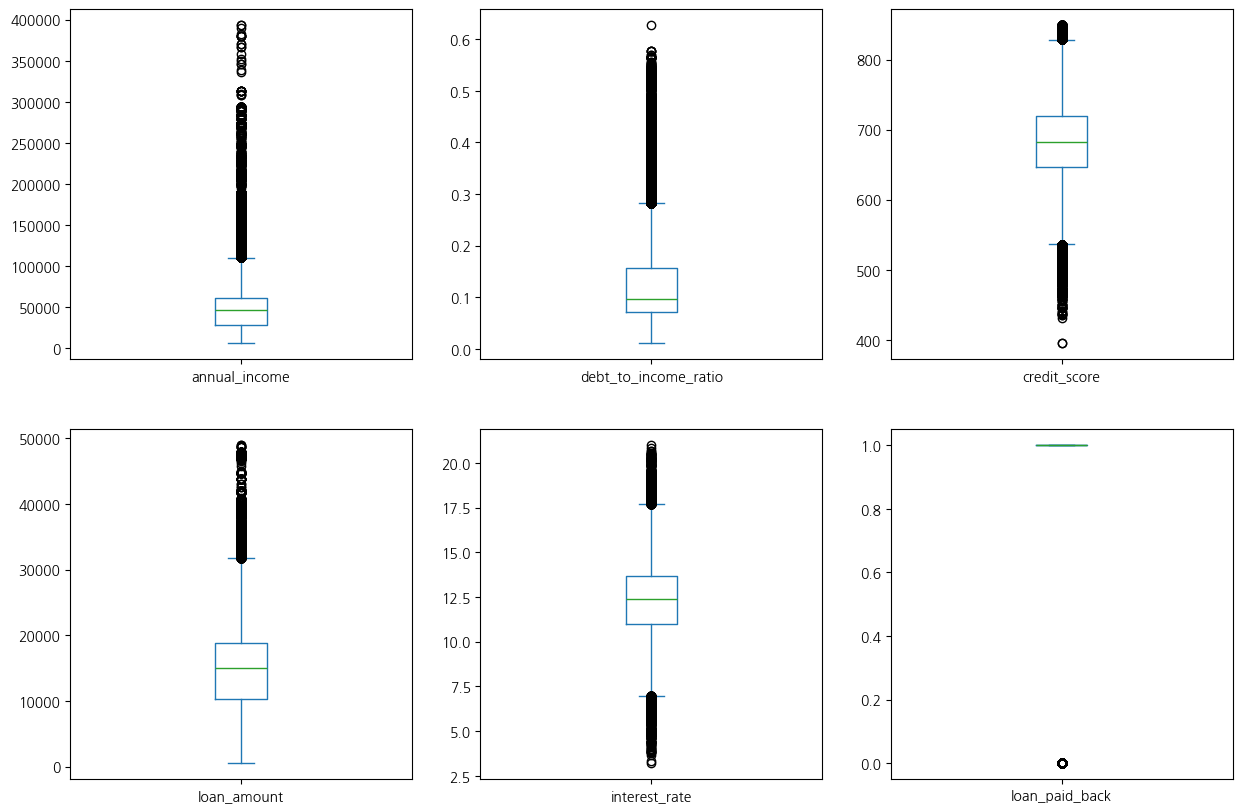

In [ ]:
print("=================이상치 확인=================")

data_train.plot(kind='box', subplots=True, layout=(2,3), figsize=(15,10))
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize

def winsorize_outliers(df, exclude_cols=['loan_paid_back'], limits=(0.01, 0.01)):
    df_cleaned = df.copy()

    numerical_cols = [
        col for col in df_cleaned.select_dtypes(include=['int64', 'float64']).columns
        if col not in exclude_cols
    ]

    print(f"윈저화 적용 변수: {numerical_cols}")

    # Winsorizing
    for col in numerical_cols:
        df_cleaned[col] = winsorize(df_cleaned[col], limits=limits)

    return df_cleaned



# 적용
data_train_winsor = winsorize_outliers(data_train)

y = data_train_winsor['loan_paid_back']

data_train_winsor.drop('loan_paid_back', axis=1, inplace=True)

print(f"'loan_paid_back'의 고유 값 분포: {y.value_counts()}")


winsorize 전: (593994, 12)
윈저화 적용 변수: ['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount', 'interest_rate']
winsorize 후: (593994, 12)
'loan_paid_back'의 고유 값 분포: loan_paid_back
1.0    474494
0.0    119500
Name: count, dtype: int64


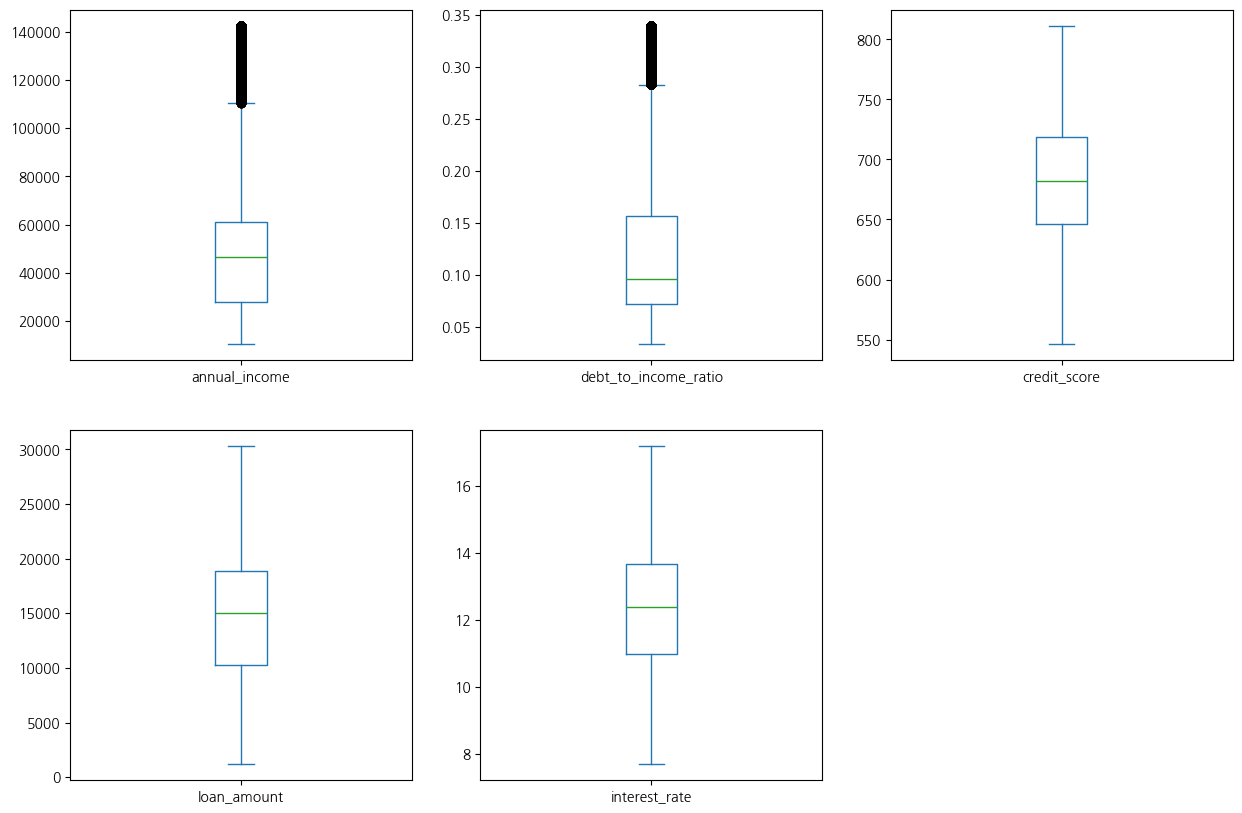

In [ ]:
# 윈저화 후 이상치 확인(박스 플롯)
data_train_winsor.plot(kind='box', subplots=True, layout=(2,3), figsize=(15,10))
plt.show()

## Feature 생성

In [ ]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, TargetEncoder, FunctionTransformer
from sklearn import set_config

set_config(transform_output="pandas")

def add_derived_features(df):
    df = df.copy()

    # LTI (Loan to Income): 연소득 대비 대출 비율
    df['lti_ratio'] = df['loan_amount'] / (df['annual_income'] + 1)

    # 추정 가처분 소득 (Estimated Disposable Income)
    dti_scaled = df['debt_to_income_ratio'].apply(lambda x: x / 100 if x > 1 else x)
    df['disposable_income'] = df['annual_income'] * (1 - dti_scaled)

    # 예상 이자 비용 (절대 금액)
    df['interest_burden'] = df['loan_amount'] * (df['interest_rate'] / 100)


    return df

def optimized_preprocessing(X_train, X_test, y_train):
    X_train = add_derived_features(X_train)
    X_test = add_derived_features(X_test)

    ohe_cols = ['gender', 'employment_status', 'marital_status']
    ord_cols = ['grade_subgrade', 'education_level']
    target_cols = ['loan_purpose']
    num_std_cols = ['credit_score', 'debt_to_income_ratio', 'interest_rate']
    num_log_cols = [
        'annual_income', 'loan_amount',
        'lti_ratio', 'disposable_income', 'interest_burden'
    ]

    # 로그 변환용 변환기 정의 (np.log1p 적용)
    log_transformer = FunctionTransformer(np.log1p, feature_names_out="one-to-one")

    # ColumnTransformer 구성
    preprocessor = ColumnTransformer(
        transformers=[
            ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ohe_cols),
            ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ord_cols),
            ('target', TargetEncoder(random_state=42), target_cols),
            ('std', StandardScaler(), num_std_cols),
            ('log_std', make_pipeline(log_transformer, StandardScaler()), num_log_cols)
        ],
        verbose_feature_names_out=False,
        remainder='passthrough'
    )

    # 학습 및 변환
    X_train_processed = preprocessor.fit_transform(X_train, y_train)
    X_test_processed = preprocessor.transform(X_test)

    return X_train_processed, X_test_processed

df_train_pp, df_test_pp = optimized_preprocessing(data_train_winsor, data_test, y)

print(df_train_pp.columns)

print(len(df_train_pp.columns))
df_train_pp.head()

Index(['gender_Female', 'gender_Male', 'gender_Other',
       'employment_status_Employed', 'employment_status_Retired',
       'employment_status_Self-employed', 'employment_status_Student',
       'employment_status_Unemployed', 'marital_status_Divorced',
       'marital_status_Married', 'marital_status_Single',
       'marital_status_Widowed', 'grade_subgrade', 'education_level',
       'loan_purpose', 'credit_score', 'debt_to_income_ratio', 'interest_rate',
       'annual_income', 'loan_amount', 'lti_ratio', 'disposable_income',
       'interest_burden'],
      dtype='object')
23


,gender_Female,gender_Male,gender_Other,employment_status_Employed,employment_status_Retired,employment_status_Self-employed,employment_status_Student,employment_status_Unemployed,marital_status_Divorced,marital_status_Married,...,education_level,loan_purpose,credit_score,debt_to_income_ratio,interest_rate,annual_income,loan_amount,lti_ratio,disposable_income,interest_burden
id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.801298,1.007942,-0.546077,0.665971,-0.630593,-2.588618,-1.156659,-0.546054,-2.332319
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.0,0.796659,-0.822920,0.689641,0.285868,-1.145108,-1.640825,-0.657860,-1.223205,-1.501466
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.796659,0.238980,-0.350171,-1.315630,0.317772,0.437774,-0.158916,0.366591,0.081272
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.796659,-2.470696,-0.832402,1.897503,0.215974,-1.610224,-1.097191,0.328303,-1.133344
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.803291,-0.291970,-1.013239,-1.087569,-0.886717,-0.091617,0.290394,-0.739788,-0.362527


## Train

In [ ]:
!pip install -q catboost xgboost lightgbm

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

import time
import warnings
warnings.filterwarnings('ignore')


X_train, X_val, y_train, y_val = train_test_split(
    df_train_pp, y, test_size=0.2, random_state=42, shuffle=True
)

neg_count = y_train.value_counts()[0]
pos_count = y_train.value_counts()[1]
scale_pos_weight_value = neg_count / pos_count


models = {
    # 1. 경사하강법 기반 모델
    "LR": LogisticRegression(
        random_state=42,
        max_iter=1000,
        class_weight='balanced'
    ),

    # 2. 확률 기반 모델
    "NB": GaussianNB(),
    "LDA": LinearDiscriminantAnalysis(),

    # 3. 트리 기반 모델
    "DT": DecisionTreeClassifier(
        random_state=42,
        class_weight='balanced'
    ),

    "RF": RandomForestClassifier(
        random_state=42,
        n_jobs=-1,
        class_weight='balanced'
    ),

    # 4. 거리 기반 모델
    "KNN": KNeighborsClassifier(),

    # 5. 부스팅 기반 모델
    "XGB": XGBClassifier(
        random_state=42,
        eval_metric="logloss",
        n_jobs=-1,
        tree_method="hist",
        use_label_encoder=False,
        scale_pos_weight=scale_pos_weight_value
    ),

    "LGBM": LGBMClassifier(
        random_state=42,
        class_weight='balanced'
    ),

    "CAT": CatBoostClassifier(
        random_state=42,
        verbose=0,
        class_weights=[1, scale_pos_weight_value]
    )
}


# 평가
def evaluate_model(name, model, X_train, y_train, X_val, y_val):
    t0 = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - t0

    y_pred = model.predict(X_val)

    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_score)
    elif hasattr(model, "decision_function"):
        y_score = model.decision_function(X_val)
        auc = roc_auc_score(y_val, y_score)
    else:
        auc = roc_auc_score(y_val, y_pred)

    acc = accuracy_score(y_val, y_pred)

    print(f"[{name}]")
    print(f"  - Accuracy : {acc:.4f}")
    print(f"  - AUC      : {auc:.4f}")
    print(f"  - 학습 소요 시간: {train_time:.3f} sec")
    print("-" * 50)

    return {
        "model_name": name,
        "accuracy": acc,
        "auc": auc,
        "train_time": train_time,
        "model": model
    }


results = []
best_model_name = None
best_auc = -1
best_model = None

print("================= 기본 모델 비교 =================\n")

for name, model in models.items():
    res = evaluate_model(name, model, X_train, y_train, X_val, y_val)
    results.append(res)

    if res["auc"] > best_auc:
        best_auc = res["auc"]
        best_model_name = name
        best_model = res["model"]

print("\n********** Best Model (by AUC) **********")
print(f"Best Model : {best_model_name}")
print(f"Best AUC   : {best_auc:.4f}")

================= 기본 모델 비교 =================

[LR]
  - Accuracy : 0.8602
  - AUC      : 0.9112
  - 학습 소요 시간: 61.465 sec
--------------------------------------------------
[NB]
  - Accuracy : 0.8914
  - AUC      : 0.8879
  - 학습 소요 시간: 0.316 sec
--------------------------------------------------
[LDA]
  - Accuracy : 0.8979
  - AUC      : 0.9099
  - 학습 소요 시간: 1.238 sec
--------------------------------------------------
[DT]
  - Accuracy : 0.8520
  - AUC      : 0.7693
  - 학습 소요 시간: 22.092 sec
--------------------------------------------------
[RF]
  - Accuracy : 0.9020
  - AUC      : 0.9081
  - 학습 소요 시간: 203.608 sec
--------------------------------------------------
[KNN]
  - Accuracy : 0.8880
  - AUC      : 0.8479
  - 학습 소요 시간: 0.097 sec
--------------------------------------------------
[XGB]
  - Accuracy : 0.8667
  - AUC      : 0.9207
  - 학습 소요 시간: 5.516 sec
--------------------------------------------------
[LightGBM] [Info] Number of positive: 379692, number of negative: 95503
[LightG

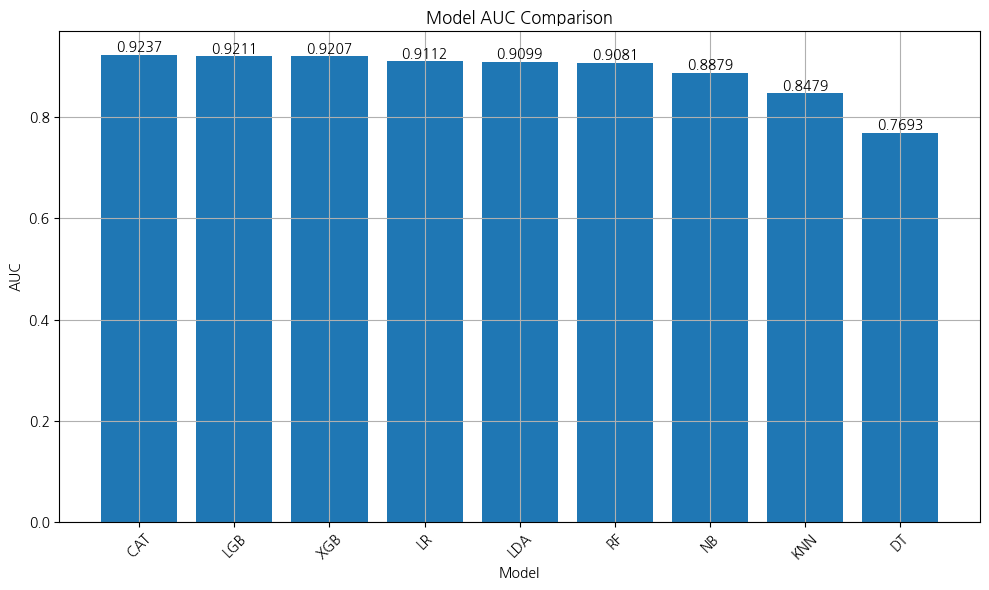

In [ ]:
# 전체 결과 시각화

model_auc_scores = [(res["model_name"][0:3], res["auc"]) for res in results]

sorted_model_auc_scores = sorted(model_auc_scores, key=lambda x: x[1], reverse=True)

sorted_model_names = [x[0] for x in sorted_model_auc_scores]
sorted_auc_values = [x[1] for x in sorted_model_auc_scores]

plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_model_names, sorted_auc_values)
plt.xlabel('Model')
plt.ylabel('AUC')
plt.title('Model AUC Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.001, round(yval, 4), ha='center', va='bottom')

plt.show()

--- [CAT] 모델로 최종 평가 ----
ROC AUC: 0.9237
accuracy: 0.8729
precision: 0.9436
recall: 0.8942
f1 score: 0.9183


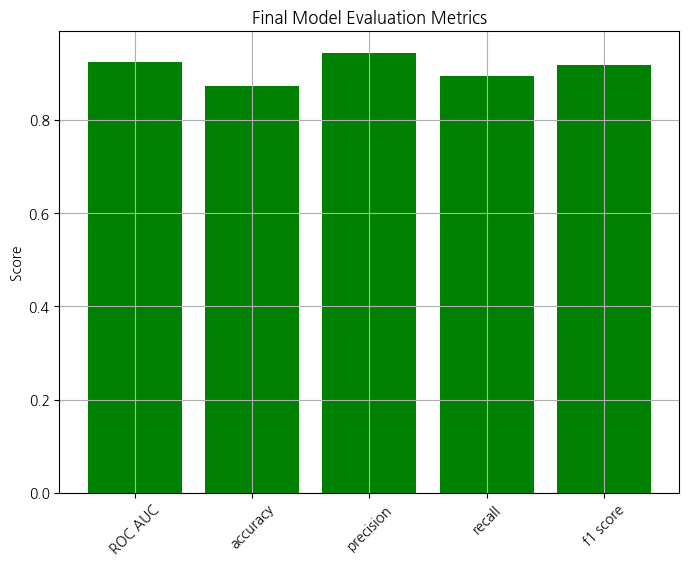

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

# 최종 평가
print(f"--- [{best_model_name}] 모델로 최종 평가 ----")

pred_proba = best_model.predict_proba(X_val)[:, 1]
pred_y = best_model.predict(X_val)

roc_score = roc_auc_score(y_val, pred_proba)
print(f"ROC AUC: {roc_score:.4f}")
print(f"accuracy: {accuracy_score(y_val, pred_y):.4f}")
print(f"precision: {precision_score(y_val, pred_y):.4f}")
print(f"recall: {recall_score(y_val, pred_y):.4f}")
print(f"f1 score: {f1_score(y_val, pred_y):.4f}")

plt.figure(figsize=(8, 6))
plt.bar(color = "green" ,x=['ROC AUC', 'accuracy', 'precision', 'recall', 'f1 score'], height=[roc_score, accuracy_score(y_val, pred_y), precision_score(y_val, pred_y), recall_score(y_val, pred_y), f1_score(y_val, pred_y)])
plt.ylabel('Score')
plt.grid(True)
plt.xticks(rotation=45)
plt.title('Final Model Evaluation Metrics')
plt.show()

In [ ]:
# Stacking
from sklearn.ensemble import StackingClassifier

meta_model = LogisticRegression()

RF_model = models['RF']
CAT_model = models['CAT']
LDA_model = models['LDA']
LR_model = models['LR']
XGB_model = models['XGB']

stacking_model = StackingClassifier(
    estimators=[
        ('RF', RF_model),
        ('cat_model', CAT_model),
        ('LDA', LDA_model),
        ('LR', LR_model),
        ('XGB', XGB_model),
    ],
    final_estimator=meta_model,
    cv=5
)

stacking_model.fit(X_train, y_train)

pred_stack = stacking_model.predict(X_val)
pred_proba_stack = stacking_model.predict_proba(X_val)[:, 1]

print(f"Stacking 앙상블 정확도: {accuracy_score(y_val, pred_stack):.4f}")
print(f"Stacking 앙상블 AUC: {roc_auc_score(y_val, pred_proba_stack):.4f}")

Stacking 앙상블 정확도: 0.9050
Stacking 앙상블 AUC: 0.9229


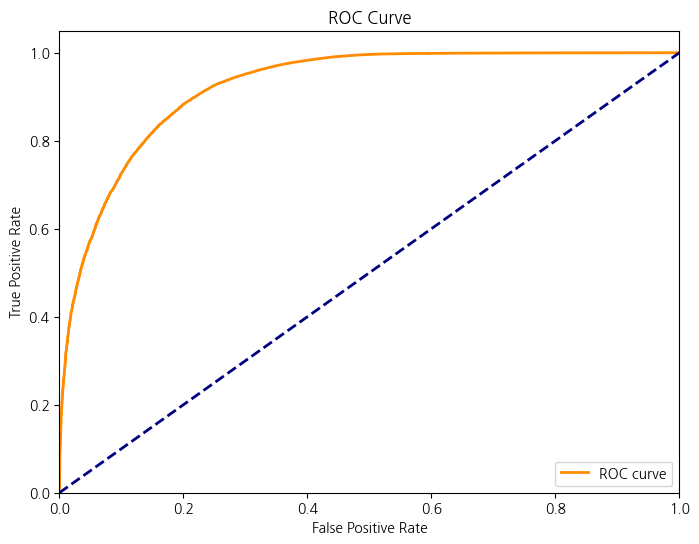

In [ ]:
from sklearn.metrics import roc_curve

# ROC Curve
def plot_roc_curve(y_true, y_pred_proba):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(y_val, pred_proba_stack)